In [1]:
# Import library and csv file with lifetime data
from matplotlib import pyplot as plt
import numpy as np
import scipy.signal as sig
filename = "lifetimeMeasurement.csv"

In [2]:
# Read from csv file and create two parallel arrays with the bin value and count 
import csv

bins = []
counts = []

with open(filename, newline='') as csvFile:
    reader = csv.reader(csvFile, quoting = csv.QUOTE_NONNUMERIC,delimiter = ',')
    for row in reader:
        bins.append(row[0])
        counts.append(int(row[1]))

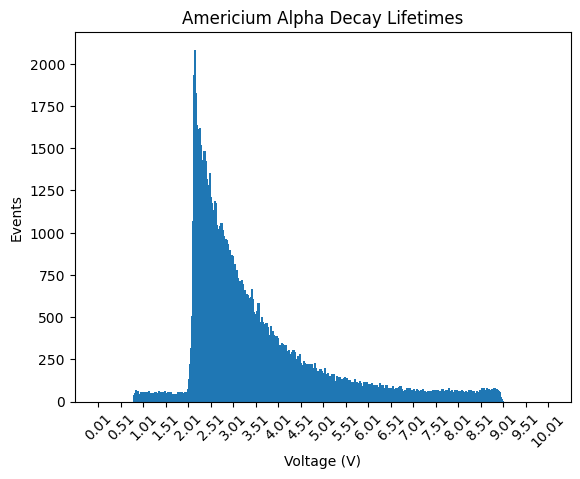

In [3]:
# Plot the data collected
plt.bar(bins, counts, width = 0.05)
plt.xticks(np.arange(min(bins), max(bins)+0.5, step=0.5), rotation=45)
plt.xlabel("Voltage (V)")
plt.ylabel("Events")
plt.title("Americium Alpha Decay Lifetimes")
plt.show()

In [4]:
# Remove the baseline noise error
n = 10
noiseArray = np.zeros((n,), dtype=int)
l = len(counts)
norm = l%n
l = l-norm
N = int(l/n)

for increment in range(0, N):
    temp = np.zeros((n,), dtype=int)
    j = n*increment
    temp = counts[j:j+n-1]
    rollingAverage = (sum(temp))/len(temp)

    if rollingAverage >= 100:
        noiseArray = np.zeros(((increment*n),), dtype=int)
        noiseArray = counts[0:increment*n]
        break

bgNoise = int((sum(noiseArray))/len(noiseArray))
cleanCounts = [val - bgNoise for val in counts]
cleanCounts = [0 if val < 0 else val for val in cleanCounts]
# voltage to seconds
binNSEC = [((0.0901*val+0.032)*1000) for val in bins]

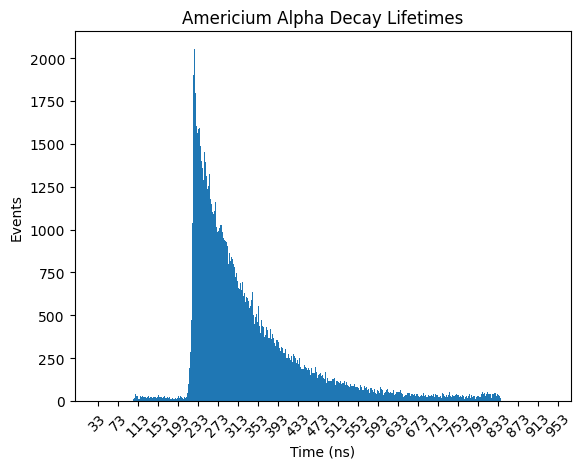

In [5]:
# Plot the data collected
plt.bar(binNSEC, cleanCounts, width = 2)
plt.xticks(np.arange(min(binNSEC), max(binNSEC)+40, step=40), rotation=45)
plt.xlabel("Time (ns)")
plt.ylabel("Events")
plt.title("Americium Alpha Decay Lifetimes")
plt.show()

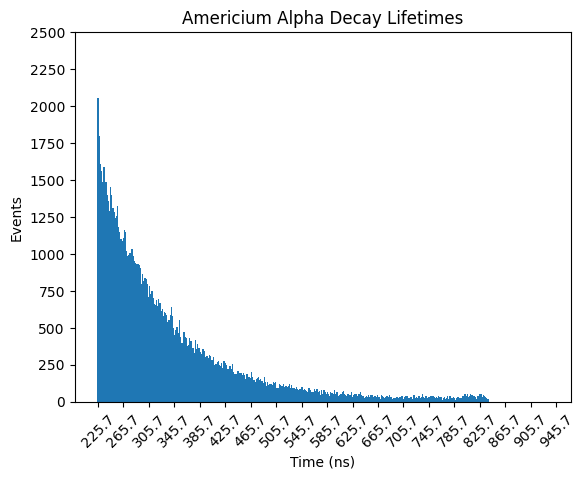

In [6]:
cleanExpo_bins = binNSEC[cleanCounts.index(max(cleanCounts)):]
cleanExpo_counts = cleanCounts[cleanCounts.index(max(cleanCounts)):]
plt.bar(cleanExpo_bins, cleanExpo_counts, width = 2)
plt.yticks(np.arange(min(cleanExpo_counts), max(cleanExpo_counts)+500, step=250))
plt.xticks(np.arange(min(cleanExpo_bins), max(cleanExpo_bins)+40, step=40), rotation=45)
plt.xlabel("Time (ns)")
plt.ylabel("Events")
plt.title("Americium Alpha Decay Lifetimes")
plt.show()

In [7]:
scatterBins = cleanExpo_bins[:-52]
scatterCounts = cleanExpo_counts[:-52]

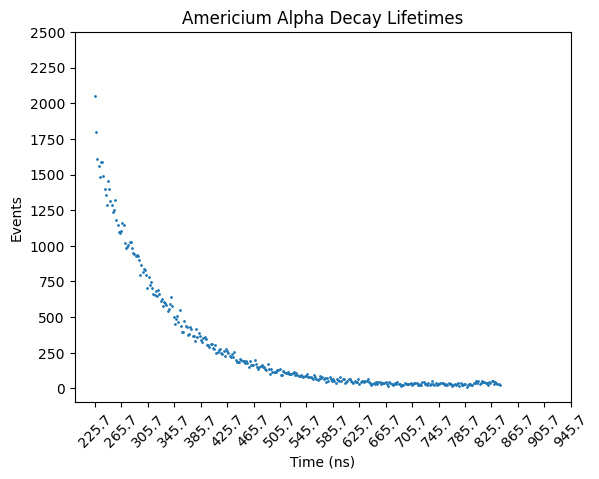

In [8]:
plt.scatter(scatterBins, scatterCounts, s=1)
plt.yticks(np.arange(min(cleanExpo_counts), max(cleanExpo_counts)+500, step=250))
plt.xticks(np.arange(min(cleanExpo_bins), max(cleanExpo_bins)+40, step=40), rotation=45)
plt.xlabel("Time (ns)")
plt.ylabel("Events")
plt.title("Americium Alpha Decay Lifetimes")
plt.show()

In [9]:
def monoExp(x, m, t, b):
    return m * np.exp(-t * x) + b

R² = 0.9936119836659304
Y = 17544.949342088683 * e^(-0.010377865012532208 * t) + 23.70387731224571
Tau = 96.35893305534518


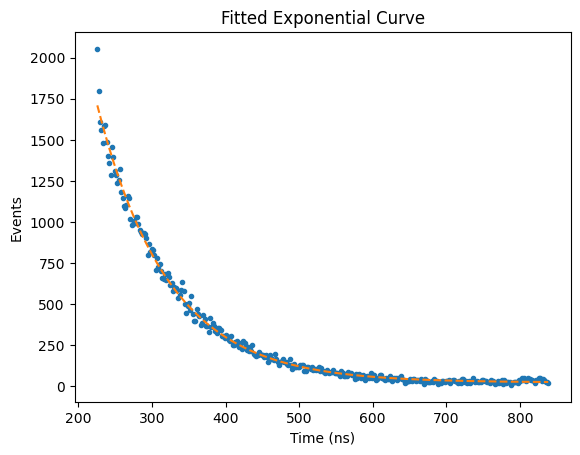

In [10]:
import scipy.optimize

scatterBins = np.array(scatterBins)
scatterCounts = np.array(scatterCounts)
p0 = (19800.91, 0.00942, 0)
params, cv = scipy.optimize.curve_fit(monoExp, scatterBins, scatterCounts, p0, maxfev=5000)
m, a, b = params

squaredDiffs = np.square(scatterCounts - monoExp(scatterBins, m, a, b))
squaredDiffsFromMean = np.square(scatterCounts - np.mean(scatterCounts))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

plt.plot(scatterBins, scatterCounts, '.', label="data")
plt.plot(scatterBins, monoExp(scatterBins, m, a, b), '--', label="fitted")
plt.title("Fitted Exponential Curve")
plt.xlabel("Time (ns)")
plt.ylabel("Events")

# inspect the parameters
print(f"Y = {m} * e^(-{a} * t) + {b}")
print(f"Tau = {1/a}")

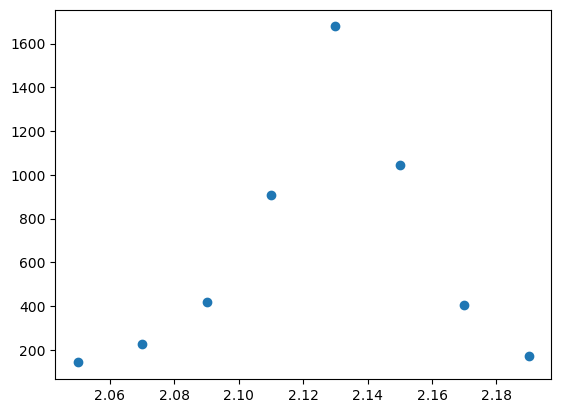

In [11]:
# remove zeros from gaussian
fName = "gauss.csv"

gaussianBins = []
gaussianCounts = []

with open(fName, newline='') as csvF:
    readerGauss = csv.reader(csvF, quoting = csv.QUOTE_NONNUMERIC,delimiter = ',')
    for row in readerGauss:
        c = int(row[1])
        b = row[0]
        if c > 120:
            gaussianBins.append(b)
            gaussianCounts.append(c)

plt.scatter(gaussianBins, gaussianCounts)
plt.show()

[180.34, 288.29, 530.86, 1151.89, 2131.06, 1327.15, 516.89, 215.9]


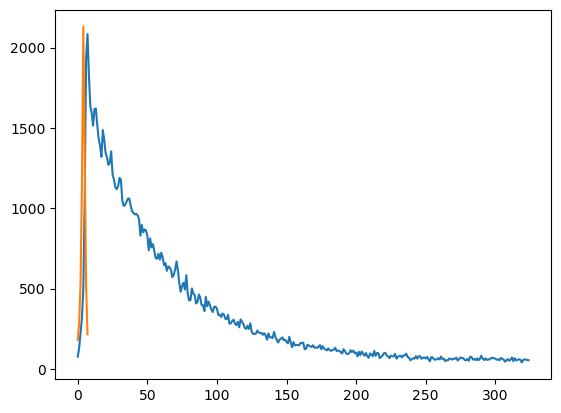

In [47]:
from scipy import signal

i=0
temp = gaussianCounts.copy()

for int in temp:
    temp[i] = int*1.27
    i=i+1

print(temp)

plt.plot(counts[100:425])
plt.plot(temp)

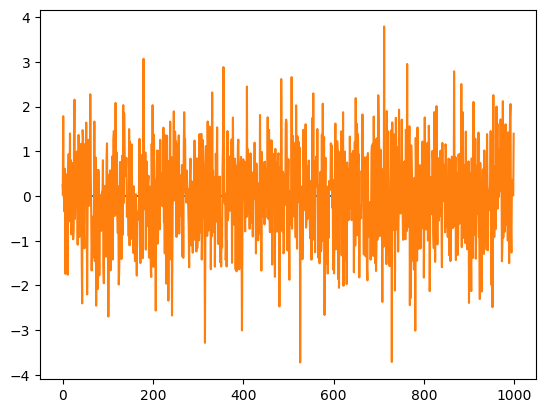

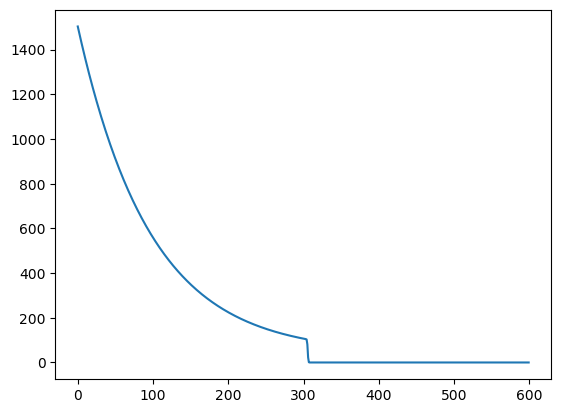

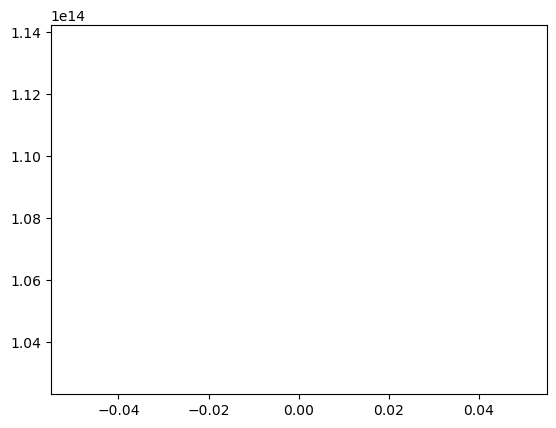

In [58]:
t = np.arange(0, 600, 1)
e = monoExp(t, 17544.95, 0.0104, 23.704)

def gaussian(x, mu, sig):
    return (        1.0 / (np.sqrt(2.0 * np.pi) * sig) * np.exp(-np.power((x - mu) / sig, 2.0) / 2))

plt.plot(t, gaussian(t, -1, 1))

#plt.plot(e)
plt.plot(y)
plt.show()

observed_data = signal.convolve(e, temp, mode='same')
plt.plot(observed_data)
plt.show()

deconvolved_data, _ = signal.deconvolve(observed_data, temp)
plt.plot(deconvolved_data)
#plt.xlim([550, 650])
plt.show()


recovered, remainder = signal.deconvolve(counts, gaussianCounts)
#plt.plot(remainder)